# imports

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

# Daten einlesen

In [3]:
raw_data = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv')
raw_data

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xf6 in position 31: invalid start byte

In [4]:
raw_data = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', encoding='ISO-8859-1')

ParserError: Error tokenizing data. C error: Expected 2 fields in line 3, saw 3


In [5]:
raw_data = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', skiprows=10, encoding='ISO-8859-1')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 30, saw 2


In [2]:
raw_data = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', skiprows=9, encoding='ISO-8859-1', delimiter=';')
raw_data

,Unnamed: 0,t,tkm,t.1,tkm.1,t.2,tkm.2,t.3,tkm.3,t.4,tkm.4
0,2005,201725248.0,4.441233e+10,48220060.0,2.086512e+10,51123597.0,1.922318e+10,16224923.0,1.091986e+10,317293828.0,9.542049e+10
1,2006,217889529.0,5.052367e+10,54627719.0,2.383104e+10,56147183.0,2.120160e+10,17453659.0,1.145105e+10,346118090.0,1.070074e+11
2,2007,226306630.0,5.378415e+10,56424791.0,2.498313e+10,59101366.0,2.293401e+10,19282950.0,1.291358e+10,361115737.0,1.146149e+11
3,2008,239265747.0,5.592783e+10,54335962.0,2.431479e+10,57553452.0,2.257465e+10,20142786.0,1.283459e+10,371297947.0,1.156519e+11
4,2009,210722363.0,4.866727e+10,41778518.0,1.883177e+10,44230667.0,1.802812e+10,15355653.0,1.030730e+10,312087201.0,9.583446e+10
5,2010,242072523.0,5.452920e+10,45116504.0,2.069364e+10,52089106.0,2.095067e+10,16436579.0,1.114344e+10,355714712.0,1.073170e+11
6,2011,257201700.0,5.899558e+10,46255587.0,2.097130e+10,56322697.0,2.301595e+10,14957057.0,1.033456e+10,374737041.0,1.133174e+11
7,2012,247116784.0,5.632553e+10,45285775.0,2.031042e+10,58225509.0,2.315949e+10,15512176.0,1.026936e+10,366140244.0,1.100648e+11
8,2013,247471748.0,5.758546e+10,45529538.0,1.984535e+10,62919401.0,2.372737e+10,17817087.0,1.145437e+10,373737774.0,1.126126e+11
9,2014,238687142.0,5.638742e+10,45888370.0,2.033661e+10,61888608.0,2.388681e+10,18538438.0,1.201796e+10,365002558.0,1.126288e+11


In [3]:
df_sep = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', skiprows=9, encoding='ISO-8859-1', sep=';',  index_col=0)
df_sep

,t,tkm,t.1,tkm.1,t.2,tkm.2,t.3,tkm.3,t.4,tkm.4
2005,201725248.0,4.441233e+10,48220060.0,2.086512e+10,51123597.0,1.922318e+10,16224923.0,1.091986e+10,317293828.0,9.542049e+10
2006,217889529.0,5.052367e+10,54627719.0,2.383104e+10,56147183.0,2.120160e+10,17453659.0,1.145105e+10,346118090.0,1.070074e+11
2007,226306630.0,5.378415e+10,56424791.0,2.498313e+10,59101366.0,2.293401e+10,19282950.0,1.291358e+10,361115737.0,1.146149e+11
2008,239265747.0,5.592783e+10,54335962.0,2.431479e+10,57553452.0,2.257465e+10,20142786.0,1.283459e+10,371297947.0,1.156519e+11
2009,210722363.0,4.866727e+10,41778518.0,1.883177e+10,44230667.0,1.802812e+10,15355653.0,1.030730e+10,312087201.0,9.583446e+10
2010,242072523.0,5.452920e+10,45116504.0,2.069364e+10,52089106.0,2.095067e+10,16436579.0,1.114344e+10,355714712.0,1.073170e+11
2011,257201700.0,5.899558e+10,46255587.0,2.097130e+10,56322697.0,2.301595e+10,14957057.0,1.033456e+10,374737041.0,1.133174e+11
2012,247116784.0,5.632553e+10,45285775.0,2.031042e+10,58225509.0,2.315949e+10,15512176.0,1.026936e+10,366140244.0,1.100648e+11
2013,247471748.0,5.758546e+10,45529538.0,1.984535e+10,62919401.0,2.372737e+10,17817087.0,1.145437e+10,373737774.0,1.126126e+11
2014,238687142.0,5.638742e+10,45888370.0,2.033661e+10,61888608.0,2.388681e+10,18538438.0,1.201796e+10,365002558.0,1.126288e+11


In [4]:
raw_data = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', skiprows=range(0, 9), nrows=18,  encoding='ISO-8859-1')
raw_data

,;t;tkm;t;tkm;t;tkm;t;tkm;t;tkm
0,2005;201725248;44412331208;48220060;2086512127...
1,2006;217889529;50523669000;54627719;2383103599...
2,2007;226306630;53784153169;56424791;2498313469...
3,2008;239265747;55927833295;54335962;2431479226...
4,2009;210722363;48667269124;41778518;1883176968...
5,2010;242072523;54529204012;45116504;2069364169...
6,2011;257201700;58995584972;46255587;2097130497...
7,2012;247116784;56325534201;45285775;2031041770...
8,2013;247471748;57585460812;45529538;1984534559...
9,2014;238687142;56387421464;45888370;2033661080...


In [3]:
raw_data = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', skiprows=range(0, 9), nrows=18,  encoding='ISO-8859-1', delimiter=';')
raw_data

,Unnamed: 0,t,tkm,t.1,tkm.1,t.2,tkm.2,t.3,tkm.3,t.4,tkm.4
0,2005,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
1,2006,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2,2007,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
3,2008,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
4,2009,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310
5,2010,242072523,54529204012,45116504,20693641696,52089106,20950670014,16436579,11143442671,355714712,107316958393
6,2011,257201700,58995584972,46255587,20971304978,56322697,23015946306,14957057,10334562425,374737041,113317398681
7,2012,247116784,56325534201,45285775,20310417708,58225509,23159485158,15512176,10269362502,366140244,110064799569
8,2013,247471748,57585460812,45529538,19845345592,62919401,23727374271,17817087,11454374098,373737774,112612554773
9,2014,238687142,56387421464,45888370,20336610800,61888608,23886812686,18538438,12017962730,365002558,112628807680


In [6]:
df_sep = pd.read_csv('46131-0003_Güterverkehr_Eisenbahn.csv', skiprows=range(0, 9), nrows=18, encoding='ISO-8859-1', sep=';',  index_col=0)
df_sep

,t,tkm,t.1,tkm.1,t.2,tkm.2,t.3,tkm.3,t.4,tkm.4
2005,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
2006,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2007,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
2008,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
2009,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310
2010,242072523,54529204012,45116504,20693641696,52089106,20950670014,16436579,11143442671,355714712,107316958393
2011,257201700,58995584972,46255587,20971304978,56322697,23015946306,14957057,10334562425,374737041,113317398681
2012,247116784,56325534201,45285775,20310417708,58225509,23159485158,15512176,10269362502,366140244,110064799569
2013,247471748,57585460812,45529538,19845345592,62919401,23727374271,17817087,11454374098,373737774,112612554773
2014,238687142,56387421464,45888370,20336610800,61888608,23886812686,18538438,12017962730,365002558,112628807680


# Daten kennenlernen und bereinigen

In [7]:
raw_data.rename(columns= {'Unnamed: 0' : 'Jahr'})

,Jahr,t,tkm,t.1,tkm.1,t.2,tkm.2,t.3,tkm.3,t.4,tkm.4
0,2005,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
1,2006,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2,2007,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
3,2008,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
4,2009,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310
5,2010,242072523,54529204012,45116504,20693641696,52089106,20950670014,16436579,11143442671,355714712,107316958393
6,2011,257201700,58995584972,46255587,20971304978,56322697,23015946306,14957057,10334562425,374737041,113317398681
7,2012,247116784,56325534201,45285775,20310417708,58225509,23159485158,15512176,10269362502,366140244,110064799569
8,2013,247471748,57585460812,45529538,19845345592,62919401,23727374271,17817087,11454374098,373737774,112612554773
9,2014,238687142,56387421464,45888370,20336610800,61888608,23886812686,18538438,12017962730,365002558,112628807680


In [4]:
raw_data1 = raw_data.rename(columns={'Unnamed: 0' : 'Jahr', 't': 'ViDtl_BefGue_t', 'tkm': 'ViDtl_BefLei_TKm', 't.1' : 'GrUeV_BefGue_t', 'tkm.1': 'GrUeV_BefLei_TKm', 't.2': 'GrUeEmpf_BefGue_t', 'tkm.2': 'GrUeEmpf_BefLei_TKm', 't.3': 'DurV_BefGue_t', 'tkm.3': 'DurV_BefLei_TKm', 't.4': 'Sum_BefGue_t', 'tkm.4': 'Sum_BefLei_TKm'
})
raw_data1

,Jahr,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
0,2005,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
1,2006,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2,2007,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
3,2008,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
4,2009,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310
5,2010,242072523,54529204012,45116504,20693641696,52089106,20950670014,16436579,11143442671,355714712,107316958393
6,2011,257201700,58995584972,46255587,20971304978,56322697,23015946306,14957057,10334562425,374737041,113317398681
7,2012,247116784,56325534201,45285775,20310417708,58225509,23159485158,15512176,10269362502,366140244,110064799569
8,2013,247471748,57585460812,45529538,19845345592,62919401,23727374271,17817087,11454374098,373737774,112612554773
9,2014,238687142,56387421464,45888370,20336610800,61888608,23886812686,18538438,12017962730,365002558,112628807680


In [5]:
raw_data1.shape

(18, 11)

In [6]:
raw_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Jahr                 18 non-null     int64
 1   ViDtl_BefGue_t       18 non-null     int64
 2   ViDtl_BefLei_TKm     18 non-null     int64
 3   GrUeV_BefGue_t       18 non-null     int64
 4   GrUeV_BefLei_TKm     18 non-null     int64
 5   GrUeEmpf_BefGue_t    18 non-null     int64
 6   GrUeEmpf_BefLei_TKm  18 non-null     int64
 7   DurV_BefGue_t        18 non-null     int64
 8   DurV_BefLei_TKm      18 non-null     int64
 9   Sum_BefGue_t         18 non-null     int64
 10  Sum_BefLei_TKm       18 non-null     int64
dtypes: int64(11)
memory usage: 1.7 KB


In [7]:
raw_data1.describe()

,Jahr,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,2013.500000,2.307100e+08,5.563042e+10,4.723572e+07,2.153051e+10,5.513933e+07,2.226260e+10,1.771054e+07,1.154000e+10,3.507955e+08,1.109635e+11
std,5.338539,1.470786e+07,4.366638e+09,4.086608e+06,1.890661e+09,4.623233e+06,1.912839e+09,2.198615e+06,1.373820e+09,1.955347e+07,7.457713e+09
min,2005.000000,2.017252e+08,4.441233e+10,4.177852e+07,1.883177e+10,4.423067e+07,1.802812e+10,1.453454e+07,9.073819e+09,3.120872e+08,9.542049e+10
25%,2009.250000,2.227438e+08,5.427501e+10,4.515882e+07,2.032219e+10,5.136497e+07,2.124508e+10,1.569036e+07,1.048089e+10,3.408998e+08,1.075892e+11
50%,2013.500000,2.319475e+08,5.612668e+10,4.590051e+07,2.077938e+10,5.623494e+07,2.272602e+10,1.796956e+07,1.145271e+10,3.566394e+08,1.116402e+11
75%,2017.750000,2.410697e+08,5.872694e+10,4.819490e+07,2.338863e+10,5.787529e+07,2.358540e+10,1.925985e+07,1.266364e+10,3.658558e+08,1.142905e+11
max,2022.000000,2.572017e+08,6.138648e+10,5.642479e+07,2.498313e+10,6.291940e+07,2.525114e+10,2.209248e+07,1.425578e+10,3.747370e+08,1.245526e+11


In [8]:
raw_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Jahr                 18 non-null     int64
 1   ViDtl_BefGue_t       18 non-null     int64
 2   ViDtl_BefLei_TKm     18 non-null     int64
 3   GrUeV_BefGue_t       18 non-null     int64
 4   GrUeV_BefLei_TKm     18 non-null     int64
 5   GrUeEmpf_BefGue_t    18 non-null     int64
 6   GrUeEmpf_BefLei_TKm  18 non-null     int64
 7   DurV_BefGue_t        18 non-null     int64
 8   DurV_BefLei_TKm      18 non-null     int64
 9   Sum_BefGue_t         18 non-null     int64
 10  Sum_BefLei_TKm       18 non-null     int64
dtypes: int64(11)
memory usage: 1.7 KB


In [9]:
raw_data1.describe()

,Jahr,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
count,18.000000,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01,1.800000e+01
mean,2013.500000,2.307100e+08,5.563042e+10,4.723572e+07,2.153051e+10,5.513933e+07,2.226260e+10,1.771054e+07,1.154000e+10,3.507955e+08,1.109635e+11
std,5.338539,1.470786e+07,4.366638e+09,4.086608e+06,1.890661e+09,4.623233e+06,1.912839e+09,2.198615e+06,1.373820e+09,1.955347e+07,7.457713e+09
min,2005.000000,2.017252e+08,4.441233e+10,4.177852e+07,1.883177e+10,4.423067e+07,1.802812e+10,1.453454e+07,9.073819e+09,3.120872e+08,9.542049e+10
25%,2009.250000,2.227438e+08,5.427501e+10,4.515882e+07,2.032219e+10,5.136497e+07,2.124508e+10,1.569036e+07,1.048089e+10,3.408998e+08,1.075892e+11
50%,2013.500000,2.319475e+08,5.612668e+10,4.590051e+07,2.077938e+10,5.623494e+07,2.272602e+10,1.796956e+07,1.145271e+10,3.566394e+08,1.116402e+11
75%,2017.750000,2.410697e+08,5.872694e+10,4.819490e+07,2.338863e+10,5.787529e+07,2.358540e+10,1.925985e+07,1.266364e+10,3.658558e+08,1.142905e+11
max,2022.000000,2.572017e+08,6.138648e+10,5.642479e+07,2.498313e+10,6.291940e+07,2.525114e+10,2.209248e+07,1.425578e+10,3.747370e+08,1.245526e+11


In [10]:
raw_data1.isnull().sum()

Jahr                   0
ViDtl_BefGue_t         0
ViDtl_BefLei_TKm       0
GrUeV_BefGue_t         0
GrUeV_BefLei_TKm       0
GrUeEmpf_BefGue_t      0
GrUeEmpf_BefLei_TKm    0
DurV_BefGue_t          0
DurV_BefLei_TKm        0
Sum_BefGue_t           0
Sum_BefLei_TKm         0
dtype: int64

In [11]:
raw_data1.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

In [17]:
raw_data1.loc[raw_data1.duplicated(), :]

,Jahr,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm


In [13]:
data = raw_data1.copy()

In [14]:
# Pfad zur CSV-Datei erstellen, in die die Daten gespeichert werden sollen
csv_file_path = 'C:\\Users\\alfa\\Data analyst\\Eisenbahn_bearbeitete_daten.csv'

# Speichere die Daten in eine CSV-Datei
data.to_csv(csv_file_path, index=False)

# Daten visualisieren

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('Eisenbahn_bearbeitete_daten.csv')
data

,Jahr,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
0,2005,201725248,44412331208,48220060,20865121275,51123597,19223183757,16224923,10919856905,317293828,95420493145
1,2006,217889529,50523669000,54627719,23831035992,56147183,21201601475,17453659,11451049129,346118090,107007355596
2,2007,226306630,53784153169,56424791,24983134695,59101366,22934008384,19282950,12913583099,361115737,114614879347
3,2008,239265747,55927833295,54335962,24314792268,57553452,22574652207,20142786,12834590690,371297947,115651868460
4,2009,210722363,48667269124,41778518,18831769684,44230667,18028124535,15355653,10307300967,312087201,95834464310
5,2010,242072523,54529204012,45116504,20693641696,52089106,20950670014,16436579,11143442671,355714712,107316958393
6,2011,257201700,58995584972,46255587,20971304978,56322697,23015946306,14957057,10334562425,374737041,113317398681
7,2012,247116784,56325534201,45285775,20310417708,58225509,23159485158,15512176,10269362502,366140244,110064799569
8,2013,247471748,57585460812,45529538,19845345592,62919401,23727374271,17817087,11454374098,373737774,112612554773
9,2014,238687142,56387421464,45888370,20336610800,61888608,23886812686,18538438,12017962730,365002558,112628807680


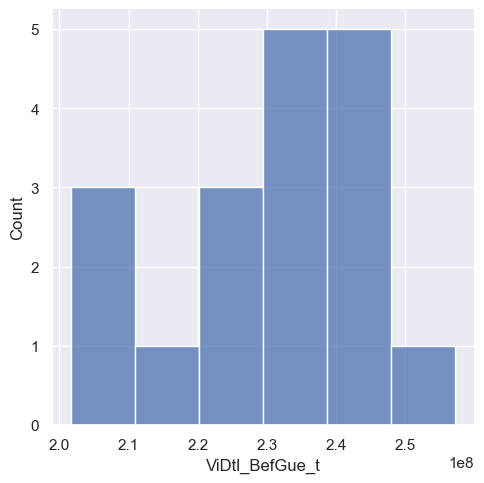

In [30]:
sns.displot(data['ViDtl_BefGue_t'])

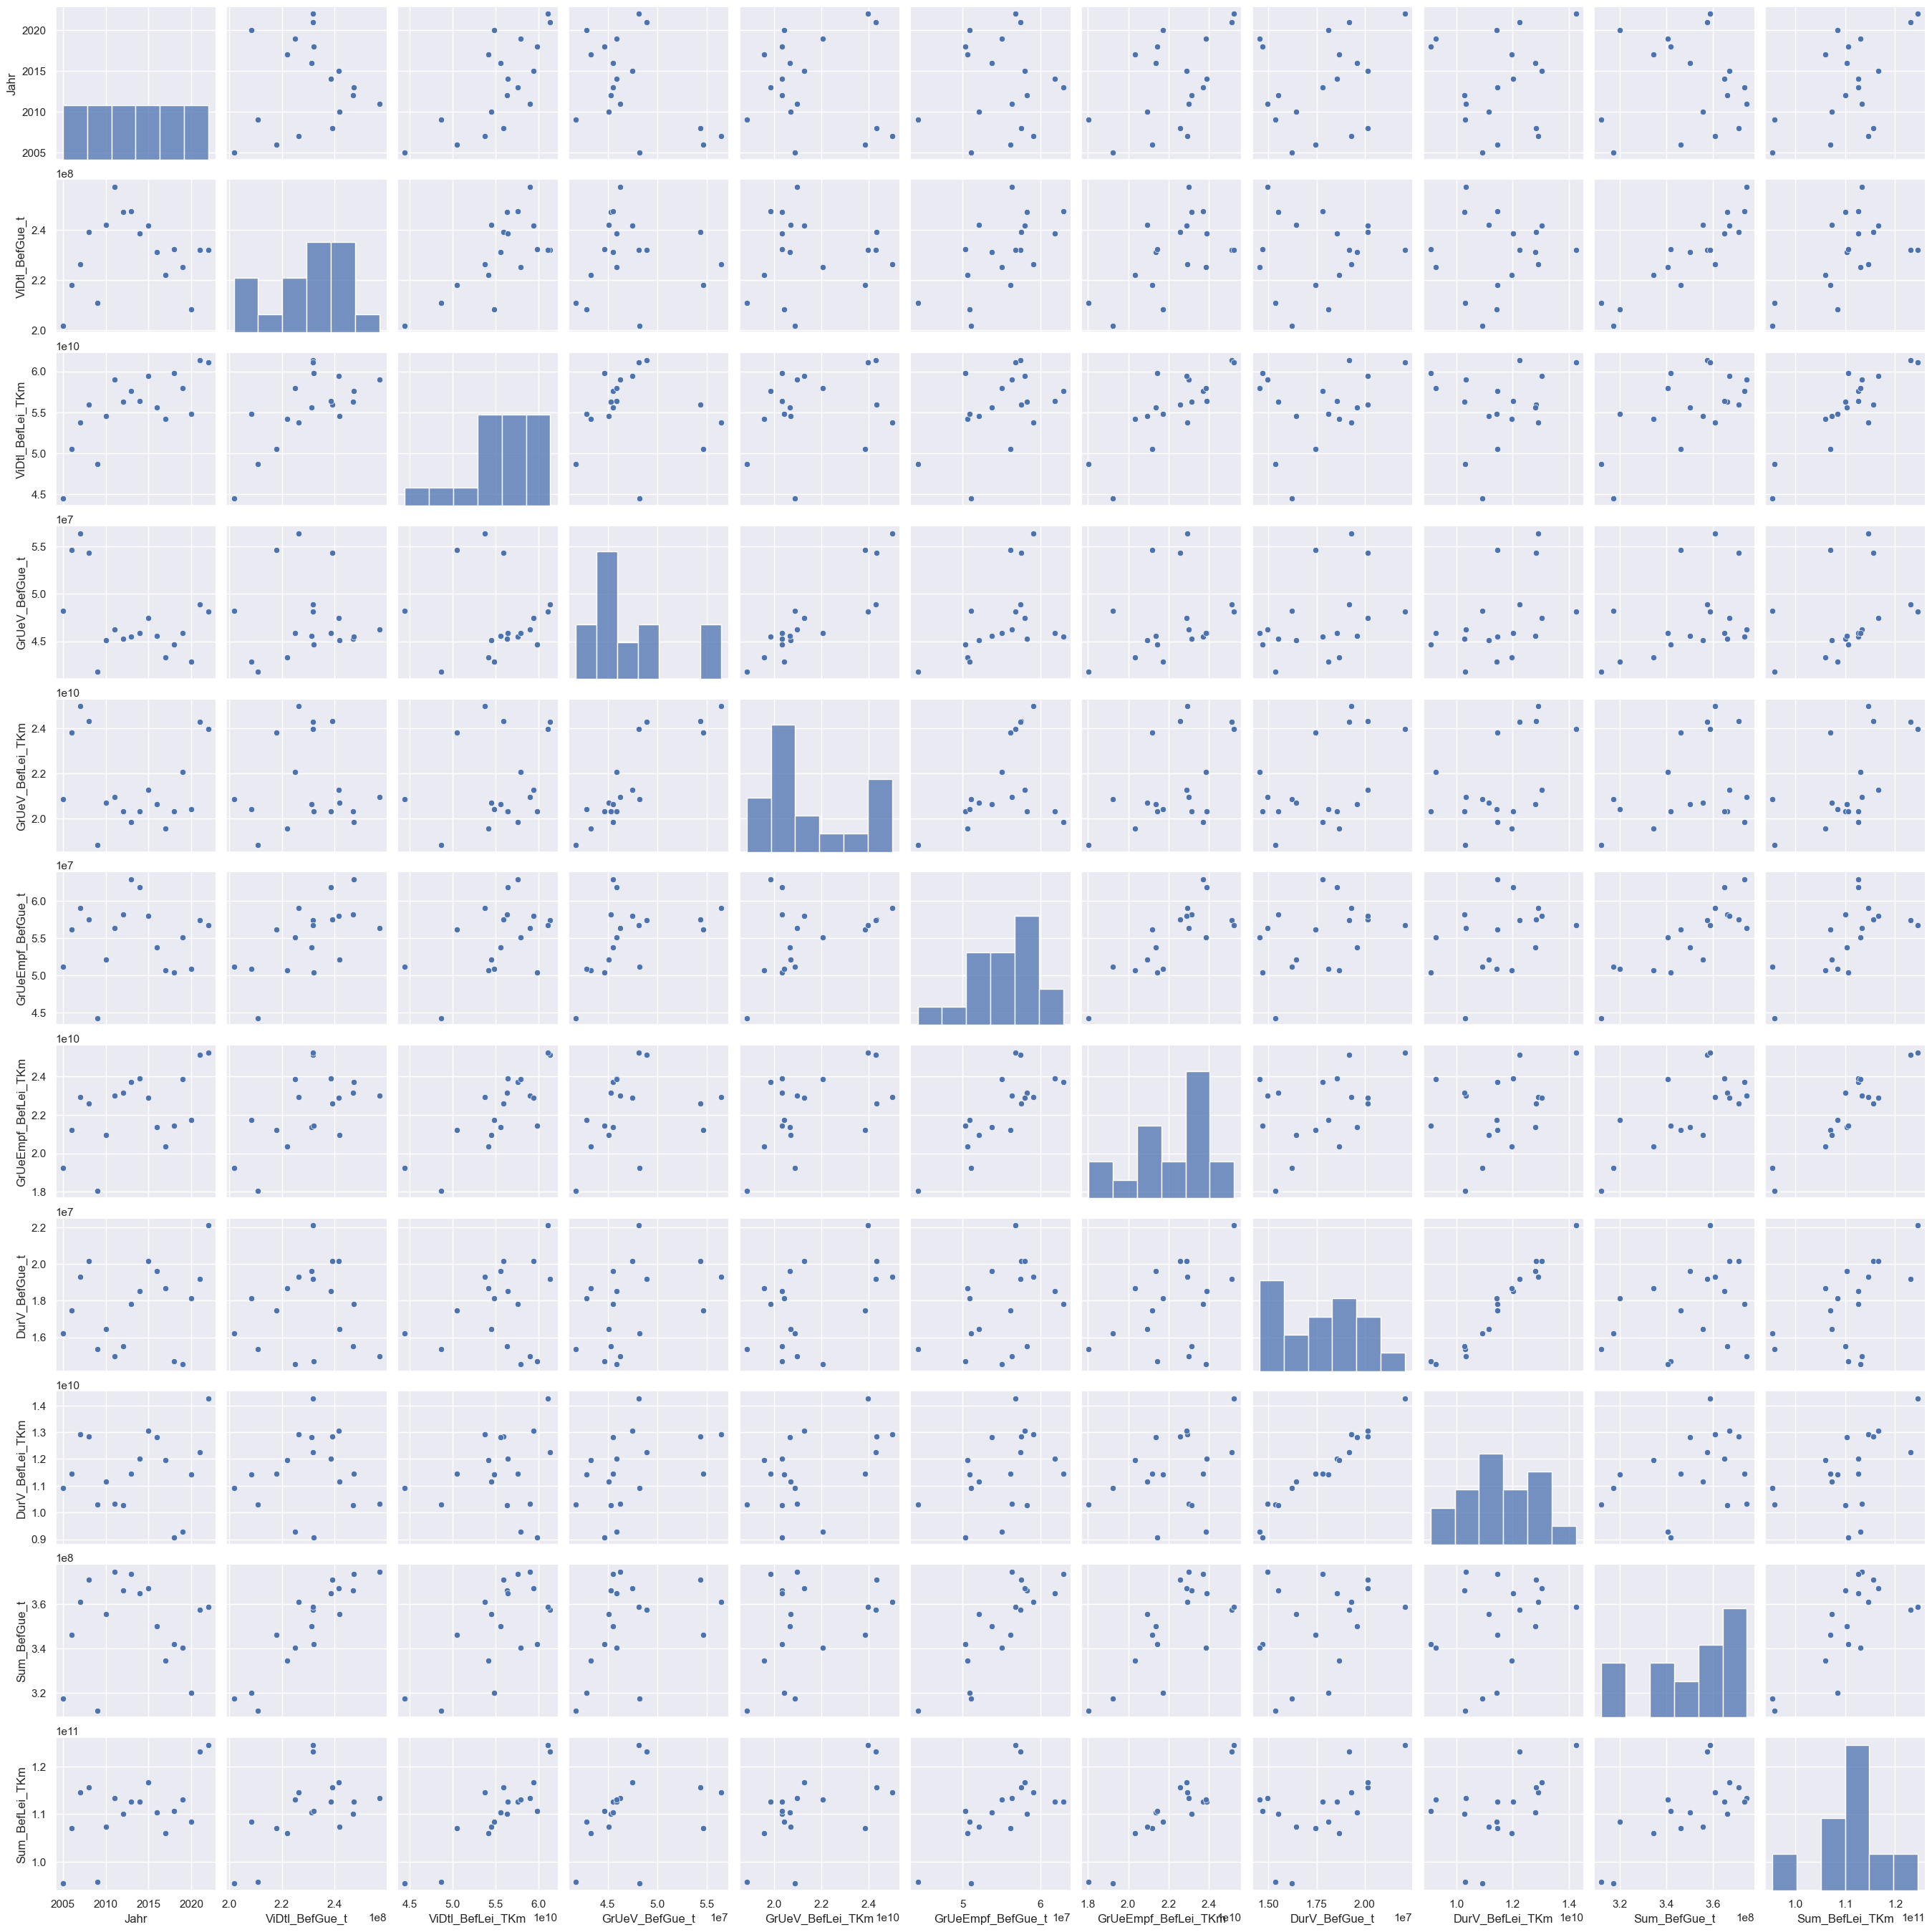

In [15]:
sns.pairplot(data)

In [3]:
data.corr()


,Jahr,ViDtl_BefGue_t,ViDtl_BefLei_TKm,GrUeV_BefGue_t,GrUeV_BefLei_TKm,GrUeEmpf_BefGue_t,GrUeEmpf_BefLei_TKm,DurV_BefGue_t,DurV_BefLei_TKm,Sum_BefGue_t,Sum_BefLei_TKm
Jahr,1.000000,0.086811,0.719978,-0.458619,-0.049352,0.013996,0.511565,0.242071,0.103812,-0.000024,0.559385
ViDtl_BefGue_t,0.086811,1.000000,0.683997,0.025716,0.022206,0.622321,0.575255,0.041840,0.067793,0.909407,0.566160
ViDtl_BefLei_TKm,0.719978,0.683997,1.000000,-0.070759,0.221854,0.471550,0.811095,0.266835,0.176170,0.641202,0.882255
GrUeV_BefGue_t,-0.458619,0.025716,-0.070759,1.000000,0.875313,0.469384,0.264825,0.391706,0.433720,0.383365,0.328300
GrUeV_BefLei_TKm,-0.049352,0.022206,0.221854,0.875313,1.000000,0.417258,0.511060,0.498242,0.502827,0.354320,0.607128
GrUeEmpf_BefGue_t,0.013996,0.622321,0.471550,0.469384,0.417258,1.000000,0.797666,0.388759,0.388723,0.846354,0.658087
GrUeEmpf_BefLei_TKm,0.511565,0.575255,0.811095,0.264825,0.511060,0.797666,1.000000,0.394381,0.341319,0.720992,0.923842
DurV_BefGue_t,0.242071,0.041840,0.266835,0.391706,0.498242,0.388759,0.394381,1.000000,0.977095,0.317696,0.563701
DurV_BefLei_TKm,0.103812,0.067793,0.176170,0.433720,0.502827,0.388723,0.341319,0.977095,1.000000,0.343415,0.502386
Sum_BefGue_t,-0.000024,0.909407,0.641202,0.383365,0.354320,0.846354,0.720992,0.317696,0.343415,1.000000,0.713453


<AxesSubplot:>

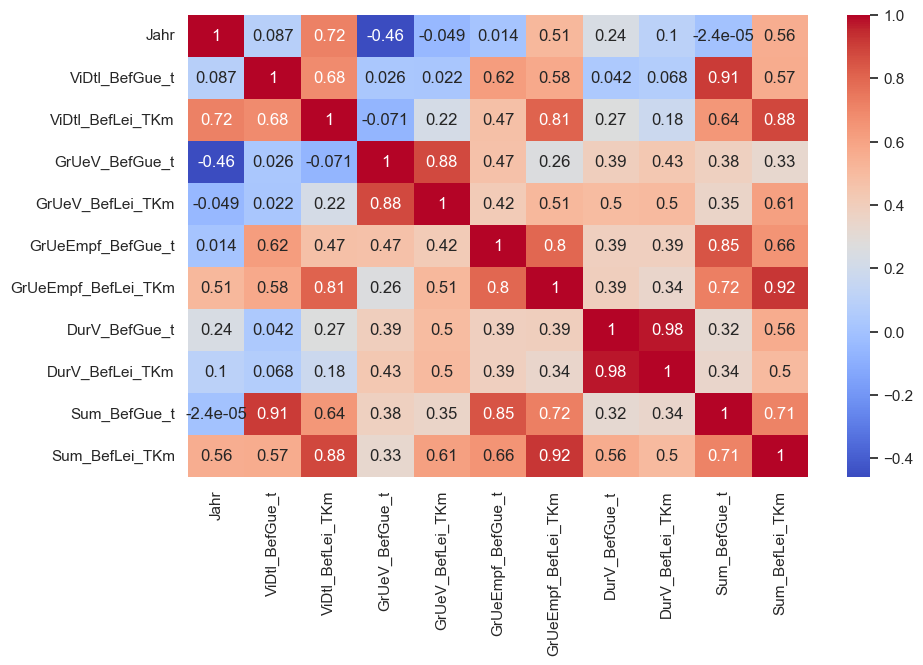

In [5]:
# Erstelle eine neue Figure-Instanz und lege die Größe fest
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap='coolwarm', annot= True)

In [ ]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Daten einlesen
data = pd.read_csv('Eisenbahn_bearbeitete_daten.csv')

# Dash-App initialisieren
app = Dash(__name__)

# Layout der Dash-App definieren
app.layout = html.Div([
    html.H4('Interactive data scaling using the secondary axis'),
    html.P("Select columns to plot:"),
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns[1:]],
        value=[],
        multi=True,
    ),
    dcc.Graph(id="graph"),
])

# Callback-Funktion für die Aktualisierung des Graphen
@app.callback(
    Output("graph", "figure"),
    Input("column-dropdown", "value")
)
def update_graph(selected_columns):
    # Figure-Objekt erstellen mit einer sekundären Y-Achse
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Schleife über ausgewählte Spalten
    for column in selected_columns:
        if column in data.columns[1:10:2]:
            # Falls die Spalte eine ungerade Zahl hat, wird sie auf der primären Y-Achse dargestellt
            fig.add_trace(
                go.Scatter(x=data['Jahr'], y=data[column], name=column),
                secondary_y=False,
            )
        elif column in data.columns[2:11:2]:
            # Falls die Spalte eine gerade Zahl hat, wird sie auf der sekundären Y-Achse dargestellt
            fig.add_trace(
                go.Scatter(x=data['Jahr'], y=data[column], name=column),
                secondary_y=True,
            )

    # Layout des Graphen aktualisieren
    fig.update_layout(title_text="Güterverkehr")
    fig.update_xaxes(title_text="Jahr")
    fig.update_yaxes(title_text="Beförderte Gütermenge in 1000 t", secondary_y=False)
    fig.update_yaxes(title_text="Beförderungsleistung in Mill. TKm", secondary_y=True)

    return fig

# Starten der Dash-App
if __name__ == '__main__':
    app.run_server(port=8050)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET /_favicon.ico?v=2.7.0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 12:31:18] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 12:31:25] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 12:31:28] "POST /_dash-update-component HTTP/1.1" 200 -


In [ ]:
import pandas as pd
from dash import Dash, dcc, html, Input, Output
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Daten einlesen
data = pd.read_csv('Eisenbahn_bearbeitete_daten.csv')

# Dash-App initialisieren
app = Dash(__name__)

# Layout der Dash-App definieren
app.layout = html.Div([
    html.H4('Interactive data scaling using the secondary axis'),
    html.P("Select columns to plot:"),
    dcc.Dropdown(
        id='column-dropdown',
        options=[{'label': col, 'value': col} for col in data.columns[1:]],
        value=[],
        multi=True,
    ),
    dcc.Graph(id="graph"),
])

# Callback-Funktion für die Aktualisierung des Graphen
@app.callback(
    Output("graph", "figure"),
    Input("column-dropdown", "value")
)
def update_graph(selected_columns):
    # Figure-Objekt erstellen mit einer sekundären Y-Achse
    fig = make_subplots(specs=[[{"secondary_y": True}]])

    # Schleife über ausgewählte Spalten
    for column in selected_columns:
        if column in data.columns[1:10:2]:
            # Falls die Spalte eine ungerade Zahl hat, wird sie auf der primären Y-Achse dargestellt
            fig.add_trace(
                go.Scatter(x=data['Jahr'], y=data[column], name=column),
                secondary_y=False,
            )
        elif column in data.columns[2:11:2]:
            # Falls die Spalte eine gerade Zahl hat, wird sie auf der sekundären Y-Achse dargestellt
            fig.add_trace(
                go.Scatter(x=data['Jahr'], y=data[column], name=column),
                secondary_y=True,
            )
            
 # Layout des Graphen aktualisieren           
    fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label="1m",
                     step="month",
                     stepmode="backward"),
                dict(count=6,
                     label="6m",
                     step="month",
                     stepmode="backward"),
                dict(count=1,
                     label="YTD",
                     step="year",
                     stepmode="todate"),
                dict(count=1,
                     label="1y",
                     step="year",
                     stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
)


    fig.update_layout(title_text="Güterverkehr")
    fig.update_xaxes(title_text="Jahr")
    fig.update_yaxes(title_text="Beförderte Gütermenge in 1000 t", secondary_y=False)
    fig.update_yaxes(title_text="Beförderungsleistung in Mill. TKm", secondary_y=True)

    return fig

# Starten der Dash-App
if __name__ == '__main__':
    app.run_server(port=8050)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET /_favicon.ico?v=2.7.0 HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
127.0.0.1 - - [15/Jun/2023 14:35:56] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 14:36:03] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [15/Jun/2023 14:36:10] "POST /_dash-update-component HTTP/1.1" 200 -
